In [124]:
import pandas as pd
import numpy as np
import re
import datetime
from dateutil.parser import parse

In [125]:
import urllib.parse
import urllib.request
import json
from gmplot import gmplot
import webbrowser
import os
import requests

Loading the Data!

In [158]:
train_data = pd.read_csv('New_Train.csv')
Total_recs = len(train_data)
print("Total records: " ,Total_recs)
print("Headers:")
print(list(train_data))

Total records:  35198
Headers:
['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


Checking the "ID" field for integrity

In [153]:
count=0

for each in train_data['id']:
    regex = re.compile(r'(\d+|\s+)')
    entries = regex.split(each)
    if each.isalnum() and entries[0]=="id" and entries[1].isdigit():
        count+=1
    else:
        print("Error at index:",count, each)
        
if(count == Total_recs):
    print("All Entries Clean")
else:
    error_count = Total_recs - count
    print("Wrong Entries:", error_count)


All Entries Clean


Checking the Vendor ID field for integrity

In [128]:
count = 0
for each in train_data['vendor_id']:
    if str(each).isdigit():
        count+=1
    else:
        print("Error  at index:",count, each)
        
        
if(count == Total_recs):
    print("All Entries Clean")
else:
    error_count = Total_recs - count
    print("Wrong Entries:", error_count)

All Entries Clean


In [129]:
def check_date_time(date):
    try: 
        parse(date)
        return True
    except ValueError:
        return False
    

In [130]:
count = 0
New_Columns = ['pickup_date', 'pickup_time']
new_frame = pd.DataFrame(index = train_data.index.values, columns=New_Columns)
for each in train_data['pickup_datetime']:
    date,time = each.split(" ")
    if check_date_time(date) and check_date_time(time):
        new_frame.loc[new_frame.index[count], "pickup_date"] = str(date)
        new_frame.loc[new_frame.index[count], "pickup_time"] = str(time)
        count+=1
    else:
        print("Error at index:",count, date, time)

In [152]:
count=0
for each in train_data['trip_duration']:
    train_data.loc[train_data.index[count], "trip_duration"] = str(datetime.timedelta(seconds=each))
    count+=1
    #print(count)

In [132]:
train_data = train_data.drop(columns=['pickup_datetime'])
print(list(train_data))

['id', 'vendor_id', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [133]:
train_data.insert(loc=2, column='pickup_date', value=new_frame['pickup_date'])
train_data.insert(loc=3, column='pickup_time', value=new_frame['pickup_time'])

In [134]:
print(list(train_data))

['id', 'vendor_id', 'pickup_date', 'pickup_time', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [135]:
count = 0
New_Columns = ['dropoff_date', 'dropoff_time']
new_frame2 = pd.DataFrame(index = train_data.index.values, columns=New_Columns)
for each in train_data['dropoff_datetime']:
    date,time = each.split(" ")
    if check_date_time(date) and check_date_time(time):
        new_frame2.loc[new_frame2.index[count], "dropoff_date"] = str(date)
        new_frame2.loc[new_frame2.index[count], "dropoff_time"] = str(time)
        count+=1
    else:
        print("Error at index:",count, date, time)

In [136]:
train_data = train_data.drop(columns=['dropoff_datetime'])
print(list(train_data))

['id', 'vendor_id', 'pickup_date', 'pickup_time', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [137]:
train_data.insert(loc=4, column='dropoff_date', value=new_frame2['dropoff_date'])
train_data.insert(loc=5, column='dropoff_time', value=new_frame2['dropoff_time'])

In [138]:
print(list(train_data))

['id', 'vendor_id', 'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [139]:
count = 0
for each in train_data['passenger_count']:
    if(str(each).isdigit()):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!")

All Entries Clean!


In [140]:
count = 0
for each in train_data['pickup_longitude']:
    if(isinstance(each, float)):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!")        

All Entries Clean!


In [141]:
count = 0
for each in train_data['pickup_latitude']:
    if(isinstance(each, float)):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!")        

All Entries Clean!


In [142]:
count = 0
for each in train_data['dropoff_longitude']:
    if(isinstance(each, float)):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!")        

All Entries Clean!


In [143]:
count = 0
for each in train_data['dropoff_latitude']:
    if(isinstance(each, float)):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!")        

All Entries Clean!


In [144]:
count = 0
for each in train_data['store_and_fwd_flag']:
    if(each=="N" or each=="Y"):
        count+=1
    else:
        print("Error at index:",count, each)

if(count == Total_recs):
    print("All Entries Clean!") 

All Entries Clean!


In [145]:
train_data.to_csv('processed_data.csv',index=False)

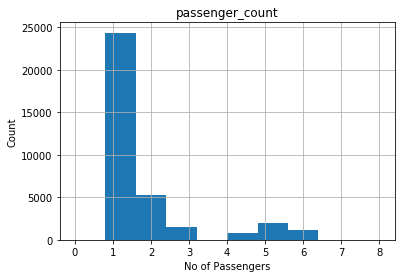

In [146]:
train_data.hist(column='passenger_count')
import matplotlib.pyplot as plt  
plt.xlabel('No of Passengers')
plt.ylabel('Count');

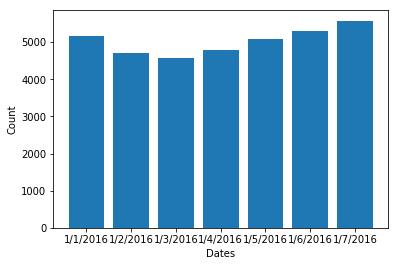

In [147]:
import matplotlib.pyplot as plt    
counts = train_data['pickup_date'].value_counts(sort=False)
plt.bar(counts.index,counts)
plt.xlabel('Dates')
plt.ylabel('Count');
plt.show()

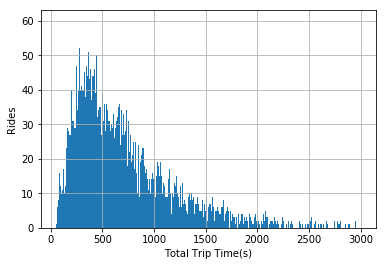

In [149]:
(train_data['trip_duration']).hist(bins=range(50, 3000, 1))
plt.xlabel('Total Trip Time(s)')
plt.ylabel('Rides');

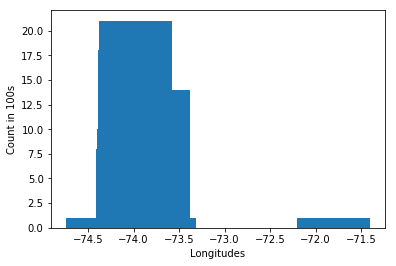

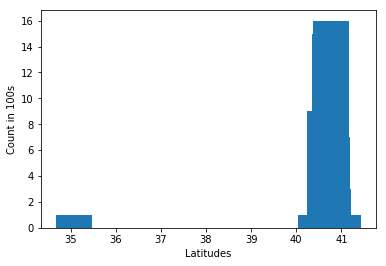

In [150]:
import matplotlib.pyplot as plt    
counts = train_data['pickup_longitude'].value_counts(sort=False)
lats = train_data['pickup_latitude'].value_counts(sort=False)
plt.bar(counts.index,counts)
plt.xlabel('Longitudes')
plt.ylabel('Count in 100s');
plt.show()
plt.bar(lats.index, lats)
plt.xlabel('Latitudes')
plt.ylabel('Count in 100s');
plt.show()

In [155]:
for each in train_data['trip_duration']:
    if(each > "1:59:00"):
        #print(each)
        ind = train_data[train_data['trip_duration']==each].index.values[0]
        #print(int(ind))
        #print(train_data.loc[[int(ind)]])
        if not os.path.isfile('suspected_errors.csv'):
            train_data.loc[[int(ind)]].to_csv('suspected_errors.csv',index=False)    
        else: # else it exists so append without writing the header
            train_data.loc[[int(ind)]].to_csv('suspected_errors.csv', mode='a',header=False,index=False)
        train_data.drop(train_data.index[[int(ind)]],inplace=True)

In [156]:
print(len(train_data))
train_data.to_csv("Cleaned_data.csv",index=False)

35139


In [159]:
gmap = gmplot.GoogleMapPlotter(40.64676666, -73.7896347, 16)
gmap.heatmap([40.64676666], [-73.7896347])
gmap.marker(40.64676666, -73.7896347, 'cornflowerblue')
gmap.marker(40.64159012, -73.78881073, 'cornflowerblue')
gmap.heatmap([40.64159012], [-73.78881073])


golden_gate_park_lats, golden_gate_park_lons = zip(*[
    (40.64676666, -73.7896347),
    (40.64159012, -73.78881073)])

gmap.plot(golden_gate_park_lats, golden_gate_park_lons, 'cornflowerblue', edge_width=2)

gmap.draw("LocationMap.html")
webbrowser.open('file://' + os.path.realpath('LocationMap.html'))

True

## 